# Poisson and Negative Binomial GLM
## Used when dependent variable is a count

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [20]:
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/poisson_sim.csv")
df.head()

id  num_awards  prog  math
0   45           0     3    41
1  108           0     1    41
2   15           0     3    44
3   67           0     3    42
4  153           0     3    40

In [21]:
dummy_variables = pd.get_dummies(df['prog'], dtype=int)
dummy_variables = dummy_variables.rename(columns={1: 'general', 2: 'vocational', 3: 'academic'})
df = pd.concat([df, dummy_variables], axis=1)
df.head()

id  num_awards  prog  math  general  vocational  academic
0   45           0     3    41        0           0         1
1  108           0     1    41        1           0         0
2   15           0     3    44        0           0         1
3   67           0     3    42        0           0         1
4  153           0     3    40        0           0         1

In [22]:
X = df[['math','vocational','academic']]
X = sm.add_constant(X)
y = df['num_awards']
X.dtypes

const         float64
math            int64
vocational      int64
academic        int64
dtype: object

In [23]:
#Fit a Poisson regression model
model = sm.GLM(y, X, family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             num_awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.75
Date:                Wed, 08 May 2024   Deviance:                       189.45
Time:                        11:06:44   Pearson chi2:                     212.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3881
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2471      0.658     -7.969      0.000      -6.538      -3.957
math           0.0702      0.011      6.619      0.000       0.049       0.091
vocational     1.0839      0.358      3.025      0.002       0.382       1.786
academic       0.3698      0.441      0.838      0.402      -0.495       1.234
==============================================================================
"""

0      0.135191
1      0.093399
2      0.166858
3      0.145016
4      0.126032
         ...   
195    2.264955
196    1.468314
197    2.264955
198    2.429553
199    2.606113
Length: 200, dtype: float64


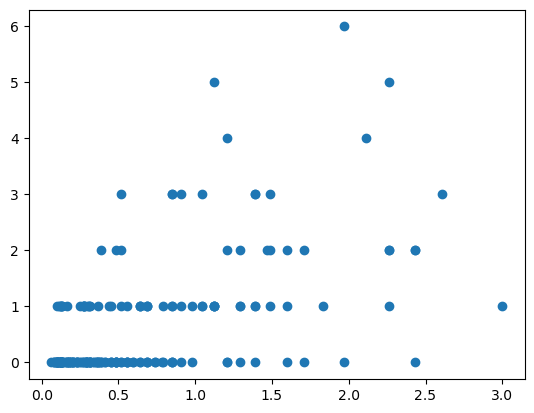

In [24]:
predicted_values = result.predict(X)
print(predicted_values)
plt.scatter(predicted_values,y)

In [25]:
model = sm.GLM(y, X, family=sm.families.NegativeBinomial())
result = model.fit()
result.summary()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             num_awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -187.98
Date:                Wed, 08 May 2024   Deviance:                       123.41
Time:                        11:06:46   Pearson chi2:                     139.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2555
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3435      0.872     -6.128      0.000      -7.052      -3.635
math           0.0723      0.015      4.859      0.000       0.043       0.101
vocational     1.0486      0.408      2.572      0.010       0.249       1.848
academic       0.3624      0.500      0.725      0.469      -0.618       1.342
==============================================================================
"""

0      0.132866
1      0.092480
2      0.165031
3      0.142823
4      0.123604
         ...   
195    2.306451
196    1.550405
197    2.306451
198    2.479290
199    2.665082
Length: 200, dtype: float64


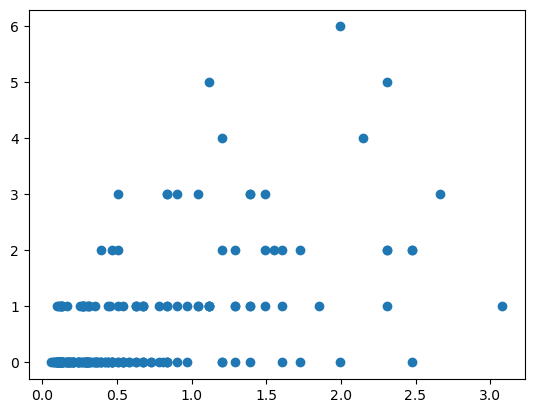

In [26]:
predicted_values = result.predict(X)
print(predicted_values)
plt.scatter(predicted_values,y)